# Evaluating creativity on social networking groups and publics activity

Data and labels to prepare: creativity function to approximate, participation in virtual social life via Internet interconnection

The most popular task *T* in machine learning is:
 - classification - relation to certain groups according to some features 
 
Classification is supervised learning, which includes sample data (set of items) and target feature that should be evaluated for other objects excluded from train data.

In [3]:
#from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics, grid_search, pipeline, preprocessing
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

In [4]:
s_data = pd.read_csv('data/talent_data.csv', index_col=0, sep=';', encoding='latin1',
                       #parse_dates=['Date'], dayfirst=True
                    )
y_target = pd.read_csv('data/talent_data.csv', index_col=0, sep=';', encoding='latin1')
y_target.drop(['intelligence', 'motivation', 'sex'], axis=1, inplace=True)
data_groups = pd.read_csv('data/talent_groups.csv', sep=';', encoding='latin1')
groups_list = pd.read_csv('data/groups.csv', header = None, index_col=0, sep=';', encoding='utf8',
                          error_bad_lines=False, names = ['id', 'group'])

In [5]:
s_data.head(7)

,creativity,intelligence,motivation,sex
id,,,,
1,1,1,0,2
2,0,0,0,1
3,0,1,1,1
4,0,0,1,1
5,2,2,2,1
6,0,0,1,1
7,2,1,1,2


In [6]:
y_target.head(7)

,creativity
id,
1,1
2,0
3,0
4,0
5,2
6,0
7,2


In [7]:
y_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 1 to 1656
Data columns (total 1 columns):
creativity    1656 non-null int64
dtypes: int64(1)
memory usage: 25.9 KB


In [8]:
n = len(y_target)
for u in range(n):
    if (y_target.values[u]==[2]):
        #print(2)
        y_target.values[u]=1
        #y_target.replace(u, 1)
    else:
        if (y_target.values[u]==1):
            #print(1)
            y_target.values[u]=1

In [9]:
y_target.head(7)

,creativity
id,
1,1
2,0
3,0
4,0
5,1
6,0
7,1


In [10]:
data_groups.head(7)

,id,groups,publics
0,1,"34649478,55674425,74999888,138441796","56106344,10175642,29534144,40390702,38683579,4..."
1,2,"19220040,16843588,62802805,22587982","101982925,57846937,159146575,135209264,4574533..."
2,3,NaN,"73375377,60130670,10175642,26762265,55526638,6..."
3,4,NaN,"98643656,21118635,36507793,81540170,87030099,3..."
4,5,"21620613,14752902,16843588,84927,56677963,1411...","102704670,2"
5,6,"19043,146245197,157092278,46914739,65087693,12...","138492208,157727585,138649060,73375377,1520401..."
6,7,"38984737,6","111031451,165627567,167561001,47727216,1647524..."


In [11]:
data_groups['number'] = 0

In [12]:
data_groups.head(7)

,id,groups,publics,number
0,1,"34649478,55674425,74999888,138441796","56106344,10175642,29534144,40390702,38683579,4...",0
1,2,"19220040,16843588,62802805,22587982","101982925,57846937,159146575,135209264,4574533...",0
2,3,NaN,"73375377,60130670,10175642,26762265,55526638,6...",0
3,4,NaN,"98643656,21118635,36507793,81540170,87030099,3...",0
4,5,"21620613,14752902,16843588,84927,56677963,1411...","102704670,2",0
5,6,"19043,146245197,157092278,46914739,65087693,12...","138492208,157727585,138649060,73375377,1520401...",0
6,7,"38984737,6","111031451,165627567,167561001,47727216,1647524...",0


In [13]:
data_groups = data_groups.fillna(0)

In [14]:
n = len(data_groups)
for u in range(n):
    #print(data_groups.values[u][2])
    s1 = str(data_groups.values[u][1])
    s2 = str(data_groups.values[u][2])
    #print(s1.count(',')+2 + s2.count(','))
    #print(data_groups.values[u])
    val = s1.count(',')+2 + s2.count(',')
    if s1=="0":
        val=val-1
    if s2=="0":
        val=val-1
    data_groups.set_value(u, 'number', val)
    #data_groups.values[u]=[data_groups.values[0], data_groups.values[1], data_groups.values[2], s1.count(',')+ 2 + s2.count(',')]

In [15]:
data_groups.head(13)

,id,groups,publics,number
0,1,"34649478,55674425,74999888,138441796","56106344,10175642,29534144,40390702,38683579,4...",43
1,2,"19220040,16843588,62802805,22587982","101982925,57846937,159146575,135209264,4574533...",16
2,3,0,"73375377,60130670,10175642,26762265,55526638,6...",25
3,4,0,"98643656,21118635,36507793,81540170,87030099,3...",81
4,5,"21620613,14752902,16843588,84927,56677963,1411...","102704670,2",9
5,6,"19043,146245197,157092278,46914739,65087693,12...","138492208,157727585,138649060,73375377,1520401...",47
6,7,"38984737,6","111031451,165627567,167561001,47727216,1647524...",1002
7,8,0,"44781847,57846937,133974750,36164349,25554967,...",76
8,9,0,"89842793,142744083,138433611,112397881,9994284...",29
9,10,0,"93250065,81831910,60442626,114977371",4


In [16]:
groups_list[100:141]

,group
id,
125706525,ДАВАЙ ЗАРАБАТЫВАТЬ ВМЕСТЕ !!!
47650309,МеТрО 2033(иди в группу)(плиз!!)
33129489,Школа №12 самый лучший 5Б
131977365,Литература
86059685,ГРУЗЧИКИ / ГРУЗОПЕРЕВОЗКИ Улан-Удэ
88290227,МХО | Мир Холодного Оружия | Ножи | Knivеs
34101831,Подслушано в МБОУ СОШ №3
148721708,lettre à vous
39719050,"Ищу тебя. Белово, Знакомства, Любовь [ТБ]"


In [18]:
from scipy.stats import linregress
linregress(list(s_data['creativity']), list(s_data['motivation']))
#linregress(list(data_groups['number']), list(s_full))

LinregressResult(slope=0.27867881783544429, intercept=0.34631689149761441, rvalue=0.35309891902760521, pvalue=8.2290135294946101e-50, stderr=0.018156140335861416)

In [20]:
groups_list = []
publics_list = []
all_list = []
freq_list = []
r=[]
n = len(data_groups)
for u in range(n):
    s1 = str(data_groups.values[u][1])
    s2 = str(data_groups.values[u][2])
    i1 = s1.split(sep=',')
    i2 = s2.split(sep=',')
    for y in i1:
        if not(int(y) in all_list):
            all_list.append(int(y))
    for y in i2:
        if not(int(y) in all_list):
            all_list.append(int(y))
freq_list = [(0, x) for x in all_list]
for u in range(n):
    s1 = str(data_groups.values[u][1])
    s2 = str(data_groups.values[u][2])
    i1 = s1.split(sep=',')
    i2 = s2.split(sep=',')
    for y in i1:
        r.append(int(y))
    for y in i2:
        r.append(int(y))

In [21]:
import collections
c = collections.Counter(r).most_common()

In [22]:
c

[(0, 927),
 (26762265, 666),
 (60130670, 575),
 (73375377, 536),
 (33064682, 461),
 (60442626, 425),
 (60981357, 385),
 (57846937, 348),
 (93250065, 348),
 (45745333, 339),
 (56106344, 272),
 (101826369, 271),
 (40567146, 239),
 (135209264, 227),
 (31976785, 226),
 (28905875, 224),
 (30602036, 206),
 (29573241, 187),
 (44554509, 181),
 (43776215, 176),
 (44781847, 175),
 (30022666, 175),
 (29534144, 169),
 (68910974, 163),
 (53845179, 160),
 (30637940, 156),
 (35689602, 155),
 (12382740, 154),
 (43215063, 154),
 (32370614, 152),
 (91050183, 147),
 (38683579, 144),
 (57876954, 143),
 (66687279, 143),
 (52537634, 142),
 (39444069, 140),
 (25980040, 140),
 (41437811, 139),
 (22798006, 139),
 (75149440, 139),
 (29559271, 139),
 (69671264, 138),
 (33338722, 138),
 (31480508, 138),
 (34215577, 137),
 (27895931, 137),
 (29606802, 136),
 (43696984, 135),
 (71729358, 130),
 (45595714, 129),
 (41111763, 126),
 (70493648, 125),
 (101982925, 123),
 (71736637, 123),
 (93700988, 120),
 (460389, 119)

In [23]:
all_list.remove(0)
all_list.remove(26762265)
all_list.remove(60130670)
all_list.remove(73375377)


In [24]:
len(all_list)

51444

In [25]:
print(collections.Counter(r).most_common()[:-50400-1:-1])

[(141030028, 1), (56772776, 1), (131951692, 1), (150082803, 1), (142772852, 1), (120338189, 1), (43986473, 1), (152933276, 1), (42192395, 1), (31271949, 1), (134463812, 1), (90326447, 1), (47263964, 1), (30362791, 1), (115045154, 1), (165725497, 1), (158389904, 1), (67141937, 1), (140222904, 1), (48970542, 1), (137509484, 1), (67779002, 1), (161300726, 1), (25833600, 1), (81975784, 1), (63337917, 1), (69998202, 1), (64137734, 1), (16088817, 1), (68920999, 1), (97372410, 1), (147856006, 1), (1750590, 1), (78763267, 1), (26729194, 1), (124830852, 1), (110511164, 1), (77239726, 1), (73190033, 1), (72588083, 1), (66523507, 1), (54803441, 1), (53655183, 1), (52475234, 1), (50931944, 1), (46671277, 1), (39934348, 1), (37204687, 1), (36745810, 1), (27177789, 1), (26188249, 1), (25416761, 1), (31876338, 1), (140375233, 1), (138930362, 1), (84592895, 1), (157626839, 1), (146166377, 1), (44636941, 1), (36785084, 1), (23241179, 1), (42594870, 1), (32740647, 1), (24666443, 1), (10530394, 1), (2969

In [26]:
d = collections.Counter(r).most_common()[:-50400-1:-1]
for t in d:
    all_list.remove(t[0])

In [27]:
len(all_list)

1044

In [28]:
for i in all_list:
    data_groups[str(i)] = 0

In [29]:
data_groups.head(7)

,id,groups,publics,number,56106344,10175642,29534144,38683579,40390849,40390806,...,33880573,23626127,34902046,44343962,97882810,1980,33991967,62398004,136553877,95984937
0,1,"34649478,55674425,74999888,138441796","56106344,10175642,29534144,40390702,38683579,4...",43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"19220040,16843588,62802805,22587982","101982925,57846937,159146575,135209264,4574533...",16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,"73375377,60130670,10175642,26762265,55526638,6...",25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,"98643656,21118635,36507793,81540170,87030099,3...",81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,"21620613,14752902,16843588,84927,56677963,1411...","102704670,2",9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,"19043,146245197,157092278,46914739,65087693,12...","138492208,157727585,138649060,73375377,1520401...",47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,"38984737,6","111031451,165627567,167561001,47727216,1647524...",1002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
list(data_groups.columns)

['id',
 'groups',
 'publics',
 'number',
 '56106344',
 '10175642',
 '29534144',
 '38683579',
 '40390849',
 '40390806',
 '76663927',
 '143493022',
 '32922940',
 '32540140',
 '111499611',
 '15755094',
 '98647548',
 '36331073',
 '60442626',
 '105999460',
 '31935896',
 '41856409',
 '101982925',
 '57846937',
 '159146575',
 '135209264',
 '45745333',
 '45595714',
 '44786979',
 '33064682',
 '64977560',
 '30602036',
 '47112298',
 '28905875',
 '29573241',
 '53852331',
 '66678575',
 '460389',
 '30637940',
 '36507793',
 '51812607',
 '22079806',
 '22822305',
 '145800770',
 '52599708',
 '39566948',
 '103421714',
 '12382740',
 '64078163',
 '99750523',
 '133180305',
 '157727585',
 '91050183',
 '137451337',
 '73858865',
 '151799840',
 '30428125',
 '67988687',
 '40390791',
 '58010960',
 '34229261',
 '118061730',
 '93039772',
 '50391638',
 '41731059',
 '165599758',
 '74982710',
 '100249506',
 '130132756',
 '29606802',
 '72199240',
 '114977371',
 '156863220',
 '79525017',
 '13372007',
 '64824897',
 '54692

In [31]:
for u in range(n):
    s1 = str(data_groups.values[u][1])
    s2 = str(data_groups.values[u][2])
    i1 = s1.split(sep=',')
    i2 = s2.split(sep=',')
    for j in list(data_groups.columns):
        if (j != 'id') and (j != 'groups') and (j != 'publics') and (j != 'number'):
            if (j in i1) or (j in i2):
                data_groups.set_value(u, j, 1)


In [32]:
data_groups.head(20)

,id,groups,publics,number,56106344,10175642,29534144,38683579,40390849,40390806,...,33880573,23626127,34902046,44343962,97882810,1980,33991967,62398004,136553877,95984937
0,1,"34649478,55674425,74999888,138441796","56106344,10175642,29534144,40390702,38683579,4...",43,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,"19220040,16843588,62802805,22587982","101982925,57846937,159146575,135209264,4574533...",16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,"73375377,60130670,10175642,26762265,55526638,6...",25,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,"98643656,21118635,36507793,81540170,87030099,3...",81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,"21620613,14752902,16843588,84927,56677963,1411...","102704670,2",9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,"19043,146245197,157092278,46914739,65087693,12...","138492208,157727585,138649060,73375377,1520401...",47,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,"38984737,6","111031451,165627567,167561001,47727216,1647524...",1002,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,8,0,"44781847,57846937,133974750,36164349,25554967,...",76,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,"89842793,142744083,138433611,112397881,9994284...",29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,"93250065,81831910,60442626,114977371",4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_groups.drop(['groups', 'publics'], axis=1, inplace=True)

In [34]:
data_groups.head(20)

,id,number,56106344,10175642,29534144,38683579,40390849,40390806,76663927,143493022,...,33880573,23626127,34902046,44343962,97882810,1980,33991967,62398004,136553877,95984937
0,1,43,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,25,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,47,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1002,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,76,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Обработка данных

In [35]:
print (s_data.shape, y_target.shape, data_groups.shape)

(1656, 4) (1656, 1) (1656, 1046)


In [36]:
x_train = data_groups

In [37]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(x_train, y_target, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [38]:
print (x_train.shape, train_data.shape, test_data.shape)

(1656, 1046) (1159, 1046) (497, 1046)


In [92]:
#columns_with_single_value = [col for col in x_train.columns if x_train[col].unique().shape[0] == 1]
#x_train = x_train.drop(columns_with_single_value, axis=1)

In [39]:
train_data.head(7)

,id,number,56106344,10175642,29534144,38683579,40390849,40390806,76663927,143493022,...,33880573,23626127,34902046,44343962,97882810,1980,33991967,62398004,136553877,95984937
82,83,53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,397,17,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,609,56,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,930,129,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
298,299,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1633,1634,110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1145,1146,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
test_data.head(7)

,id,number,56106344,10175642,29534144,38683579,40390849,40390806,76663927,143493022,...,33880573,23626127,34902046,44343962,97882810,1980,33991967,62398004,136553877,95984937
1198,1199,180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1618,1619,78,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,1598,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1476,1477,107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1123,1124,71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,1014,219,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,1554,62,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from catboost import CatBoostClassifier

pca ~600

## Pipeline

## Метод главных компонент

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=100)
X_train_pca = tsvd.fit_transform(train_data)
X_test_pca = tsvd.transform(test_data)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression()
clf.fit(X_train_pca, train_labels)
print (metrics.accuracy_score(test_labels, clf.predict(X_test_pca)))
print (metrics.roc_auc_score(test_labels, clf.predict_proba(X_test_pca)[:, 1]))

In [ ]:
predsvd = clf.predict(X_test_pca)
predsvd1 = clf.predict_proba(X_test_pca)
print(*predsvd[:25])
print(*predsvd1[:25])
print(*test_labels[:25])

## CatBoost

$\large train \_data \rightarrow \sum_n \{ Decision Tree\} \rightarrow output \text{ } \{0, 1\}$

In [42]:
categorical_data_columns =[]

for j in list(data_groups.columns):
        if (j != 'id') and (j != 'groups') and (j != 'publics') and (j != 'number'):
            categorical_data_columns.append(j)
            

            
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)
print(categorical_data_indices)

[False False  True ...,  True  True  True]


In [43]:
catf = []
for i in range(len(categorical_data_indices)):
    if (categorical_data_indices[i]==True):
        catf.append(i)
#print(catf)

In [44]:
cat = CatBoostClassifier(iterations=17
                         #900
                         , depth=9, learning_rate=0.03, loss_function='Logloss', logging_level='Verbose')


In [45]:
#train the model
cat.fit(train_data, train_labels, cat_features=catf)
# make the prediction using the resulting model
preds_class = cat.predict(test_data)

0:	learn: 0.6921862	total: 634ms	remaining: 10.1s
1:	learn: 0.6905434	total: 1.84s	remaining: 13.8s
2:	learn: 0.6890814	total: 2.64s	remaining: 12.3s
3:	learn: 0.6874747	total: 3.46s	remaining: 11.2s
4:	learn: 0.6858376	total: 4.04s	remaining: 9.71s
5:	learn: 0.6844961	total: 4.87s	remaining: 8.93s
6:	learn: 0.6828624	total: 5.69s	remaining: 8.13s
7:	learn: 0.6812549	total: 6.49s	remaining: 7.3s
8:	learn: 0.6793416	total: 7.28s	remaining: 6.47s
9:	learn: 0.6778365	total: 7.93s	remaining: 5.55s
10:	learn: 0.6765059	total: 8.73s	remaining: 4.76s
11:	learn: 0.6745704	total: 9.38s	remaining: 3.91s
12:	learn: 0.6733213	total: 10.1s	remaining: 3.11s
13:	learn: 0.6720309	total: 10.7s	remaining: 2.3s
14:	learn: 0.6703511	total: 11.2s	remaining: 1.5s
15:	learn: 0.6690730	total: 11.9s	remaining: 742ms
16:	learn: 0.6677719	total: 12.7s	remaining: 0us


In [46]:
metrics.accuracy_score(test_labels, preds_class)

0.57344064386317906

In [47]:
metrics.average_precision_score(test_labels, preds_class)

0.50342044478710268

In [48]:
preds_class

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [49]:
test_labels

,creativity
id,
1199,0
1619,1
1598,0
1477,1
1124,0
1014,0
1554,1
891,0
1105,0


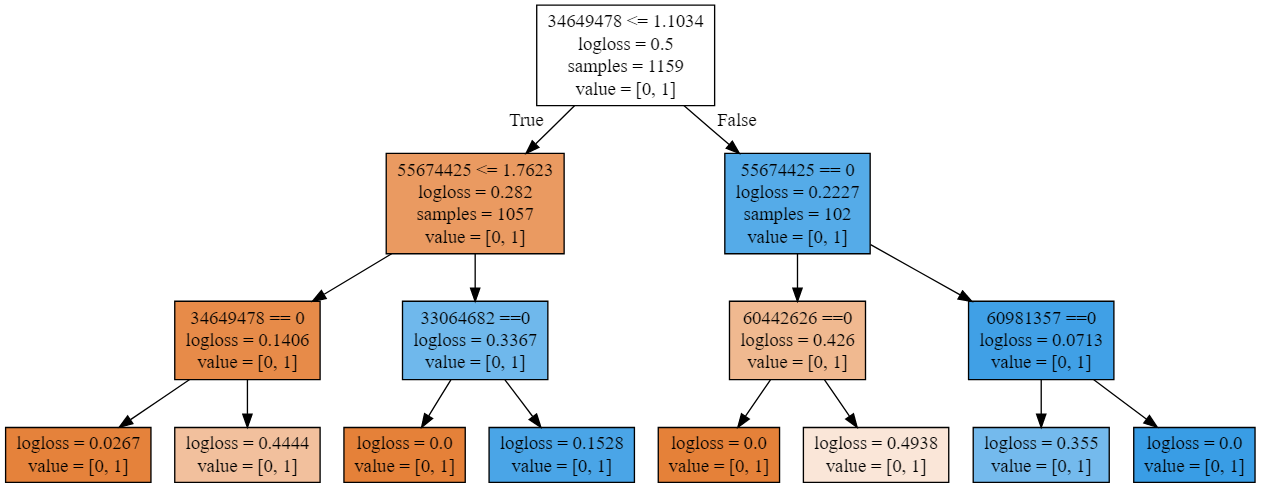

Схема работы алгоритма бинарного дерева